## Automated discovery of asymptotic solutions

In this notebook, we demonstrate how AutoScatter can be used to discover asymptotic solutions, exemplarily demonstrated for the optomechanical circulator discussed in Section VI of our article. 

An isolator is a three-port device in which the signal entering one of the ports is scattered exclusively to the next port in a clockwise (anticlockwise) direction with unity transmission. A circulator has the scattering matrix:

$S_\mathrm{target}=\begin{pmatrix}0&0&1\\ 1&0&0\\ 0&1&0 \end{pmatrix}$

There exist solutions, which require three modes and three couplings between those modes to realize a circulator, see also our notebook 2\_circulator.ipynb. However, in many hardware platforms there are experimental constraints that prevent the port modes from interacting directly with each other making it impossible to realize those circulators only consisting of three modes. E.g., in [Bernier et al.](https://www.nature.com/articles/s41467-017-00447-1), they propose a circulator scheme, in which the interaction between the port modes is mediated by two far-detuned bus modes. The couplings of those bus modes have to assume an asymptotic limit to realize an ideal circulator. We implemented those bus modes in their asymptotic limit as a new building block in AutoScatter. Using the parameter num_far_detuned_modes one can control how many building blocks one wants to use.

For further details, checkout our [GitHub](https://github.com/jlandgr/autoscatter) and [arxiv:2404.14887](https://arxiv.org/abs/2404.14887).

In [1]:
# In case you are using Google Colab, this cell will install you AutoScatter
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install git+https://github.com/jlandgr/autoscatter.git

In [2]:
import numpy as np
import sympy as sp
import scipy.optimize as sciopt

import jax
import copy
jax.config.update("jax_enable_x64", True)

import jax.numpy as jnp

import autoscatter.symbolic as sym
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import autoscatter.constraints as msc
import autoscatter.architecture_optimizer as arch_opt
from tqdm import trange

np.set_printoptions(linewidth=200)

In [3]:
# Do not allow any coupling between the (optical) port modes
enforced_constraints = [msc.Constraint_coupling_zero(0,1), msc.Constraint_coupling_zero(0,2), msc.Constraint_coupling_zero(1,2)]

# Define target scattering behavior
S_target = sp.Matrix([[0,1,0],[0,0,1],[1,0,0]])
sym.render(S_target)

# All couplings to the far-detuned modes are rescaled by the respective detuning (see paper).
# However, the signs of the detunings is still free to be chosen. You have to loop over all possible signs using the detuning_signs_far_detuned_modes parameter.
# It is a list whose elements include the sign of all far-detuned modes. For two far-detuned modes, you have to test the combinations [1,1] and [1,-1]. All other combinations are covered by symmetry.

optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_far_detuned_modes=2, # two far-detuned modes
    detuning_signs_far_detuned_modes=[1, -1], 
    enforced_constraints=enforced_constraints
)

<IPython.core.display.Math object>

fully connected graph is a valid graph


In [4]:
irreducible_graphs = optimizer.perform_depth_first_search()

prepare list of all possible graphs


5832it [00:00, 305722.72it/s]


5832 graphs identified
start depth-first search
test all graphs with 17 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


test all graphs with 16 degrees of freedom:


100%|██████████| 9/9 [00:00<00:00, 26.33it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 42/42 [00:01<00:00, 26.13it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 132/132 [00:06<00:00, 21.29it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 309/309 [00:21<00:00, 14.15it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 426/426 [00:16<00:00, 25.20it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 414/414 [00:19<00:00, 21.68it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 225/225 [00:09<00:00, 24.23it/s]


test all graphs with 9 degrees of freedom:


100%|██████████| 54/54 [00:02<00:00, 24.29it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 54 elements


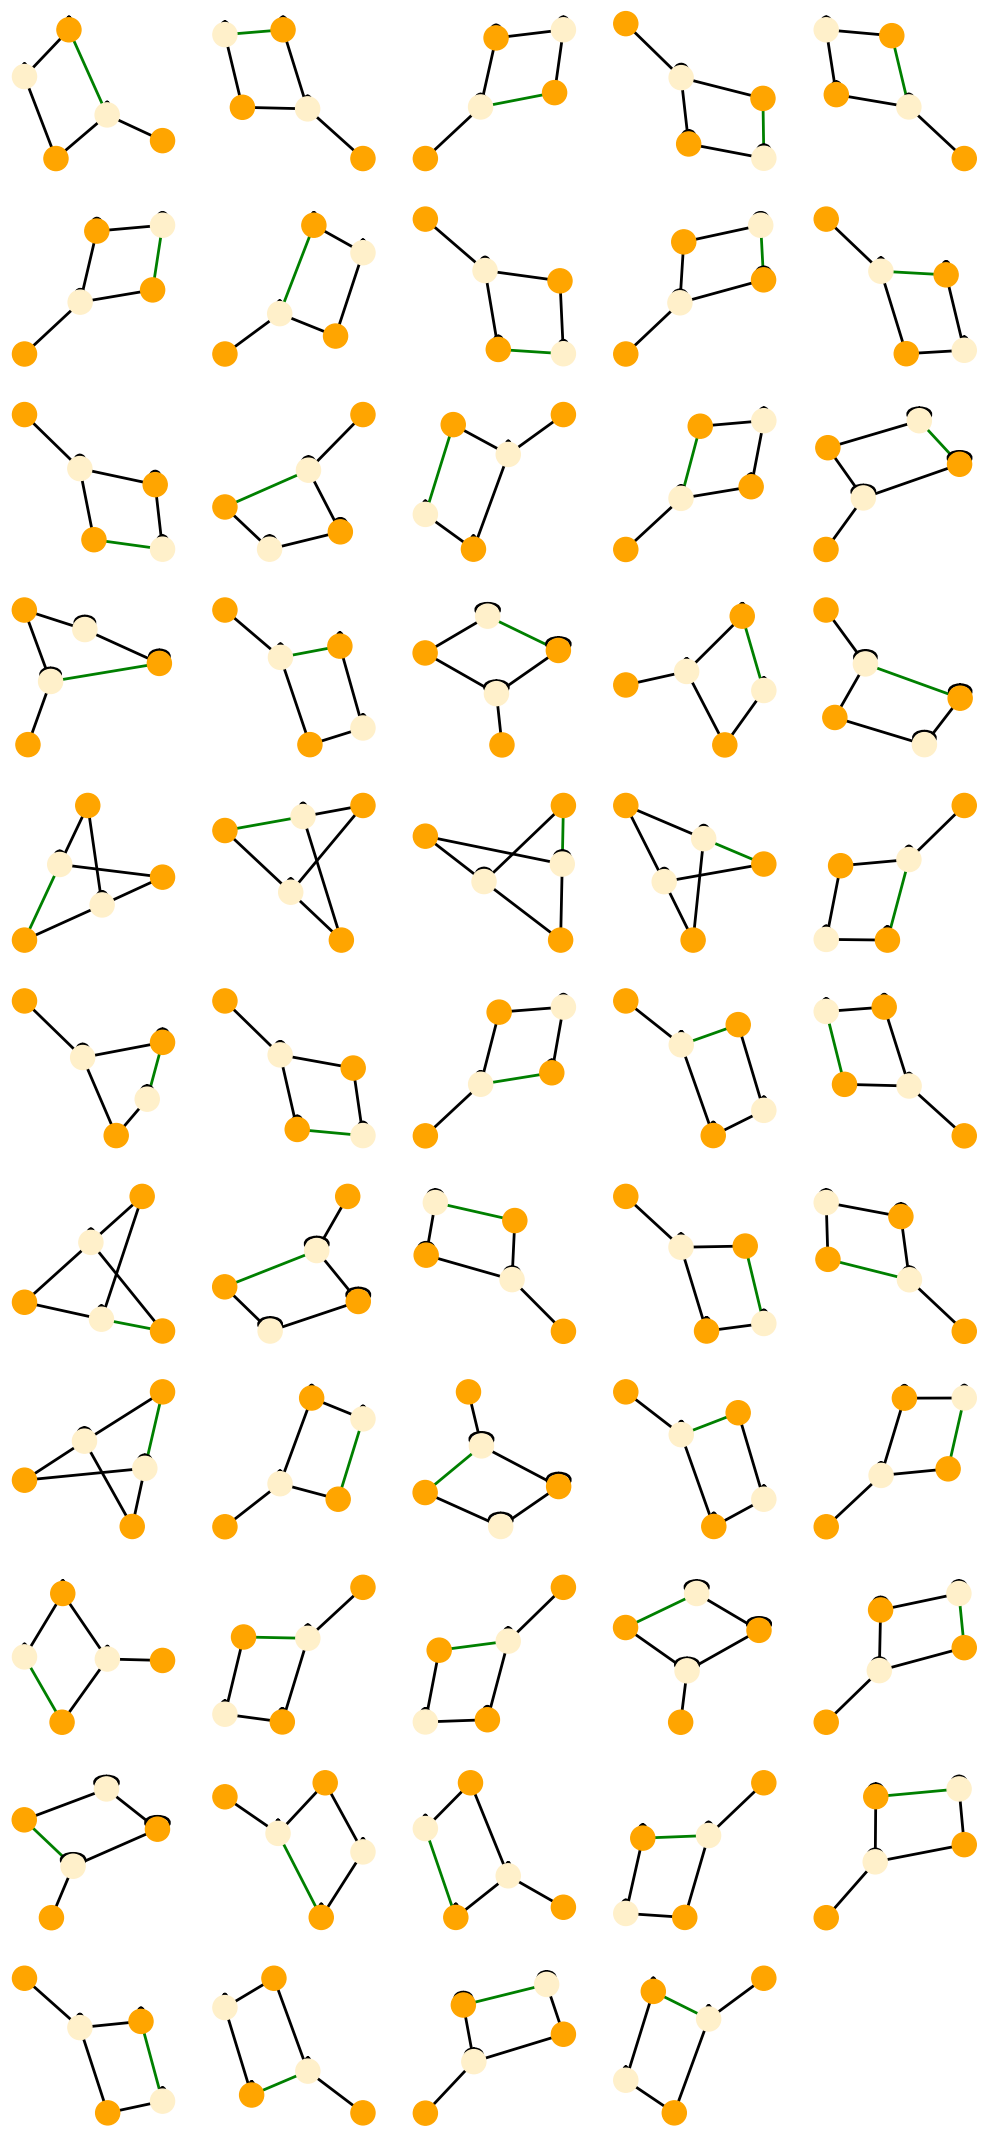

In [5]:
# Plot all identified graphs, all of them are identical (up to symmetry or gauge transformations) with the two graphs shown in Fig. 4b: Irreducible graphs
node_colors = ['orange', 'orange', 'orange', '#FFF0CA', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)

In [6]:
# For completeness: Try out the other sign combination for the detunings
optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_far_detuned_modes=2, # two far-detuned modes
    detuning_signs_far_detuned_modes=[1, 1], 
    enforced_constraints=enforced_constraints
)
irreducible_graphs = optimizer.perform_depth_first_search()

fully connected graph is a valid graph
prepare list of all possible graphs


5832it [00:00, 391591.92it/s]


5832 graphs identified
start depth-first search
test all graphs with 17 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00, 25.00it/s]


test all graphs with 16 degrees of freedom:


100%|██████████| 9/9 [00:00<00:00, 26.32it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 42/42 [00:04<00:00,  8.95it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 113/113 [00:04<00:00, 23.70it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 240/240 [00:13<00:00, 17.69it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 291/291 [00:12<00:00, 24.17it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 229/229 [00:10<00:00, 21.30it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 72/72 [00:03<00:00, 23.45it/s]


test all graphs with 9 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 72 elements


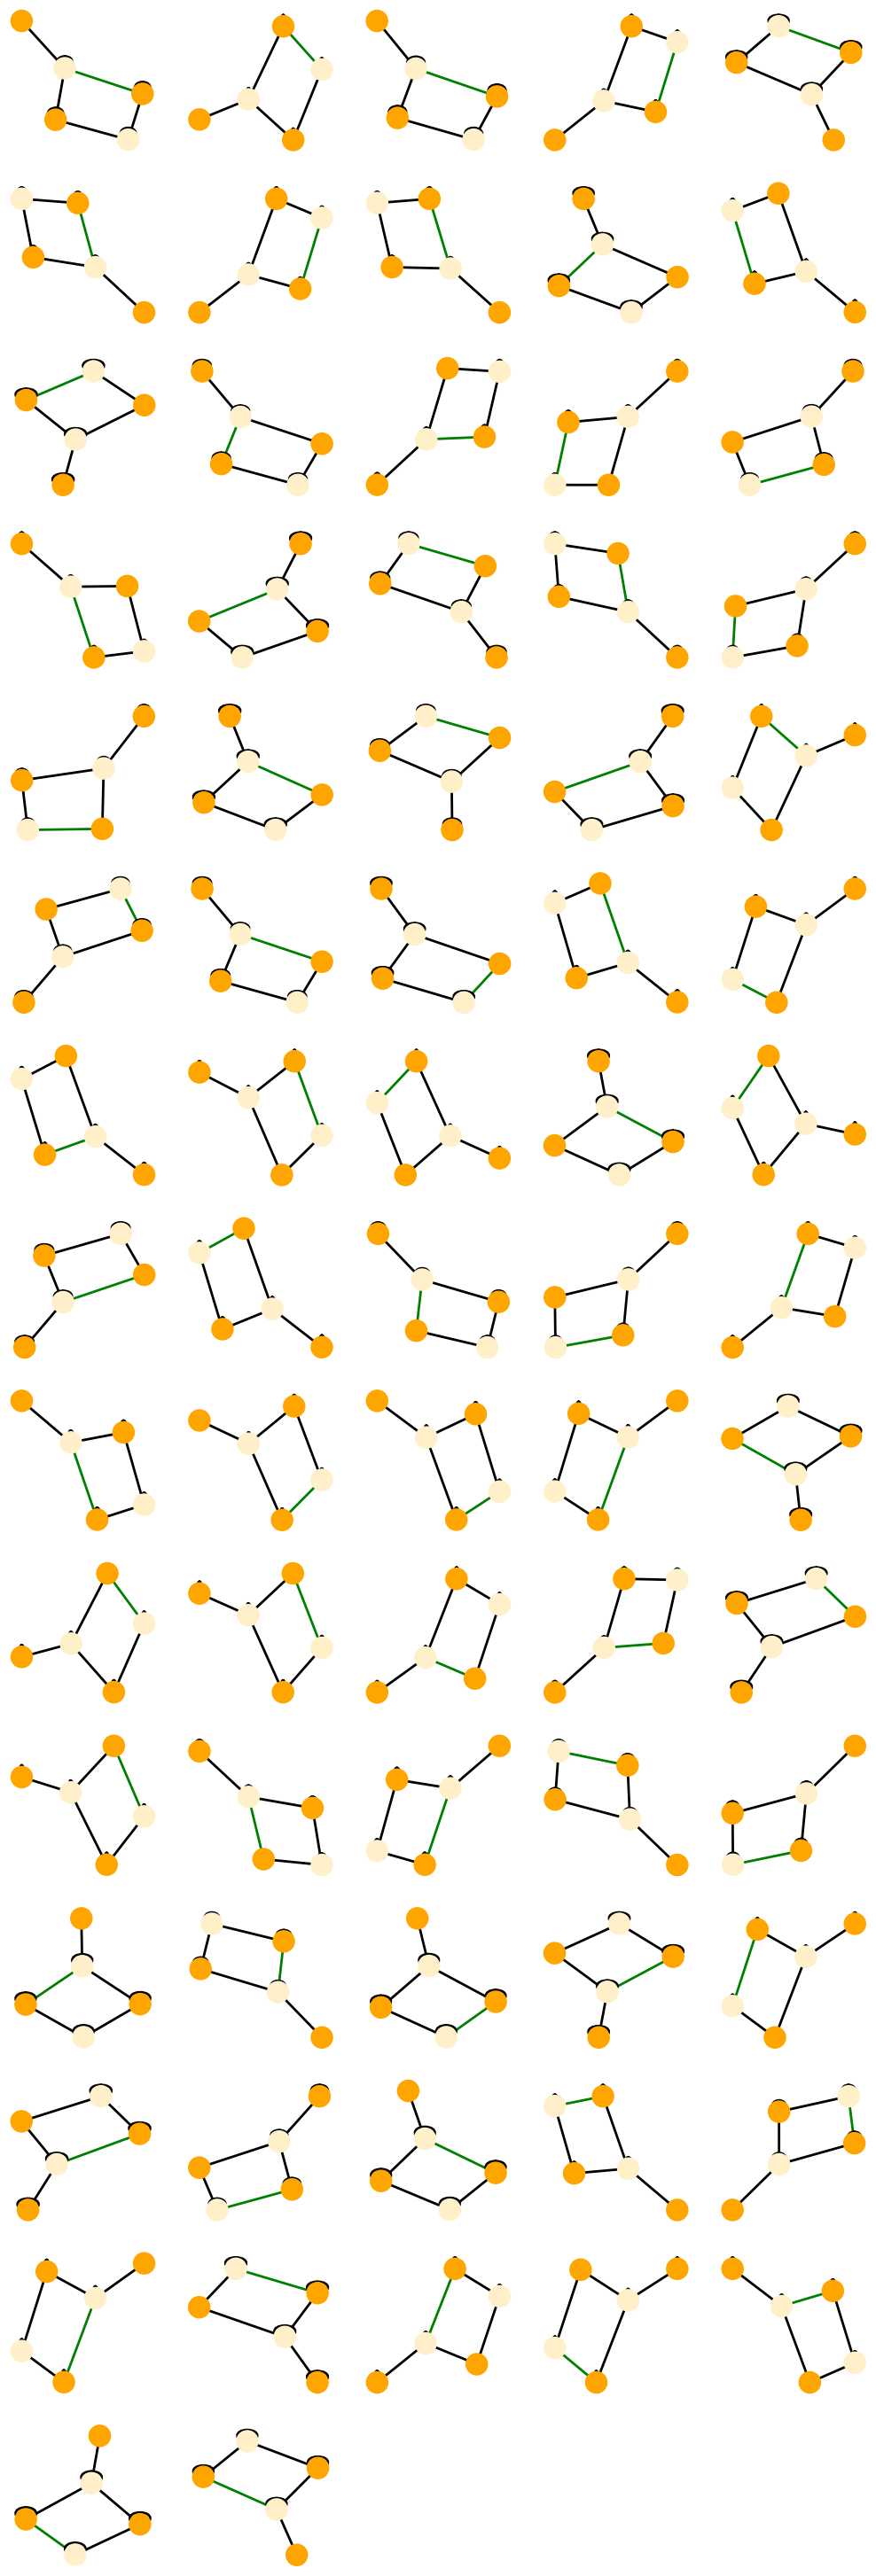

In [7]:
# Plot all identified graphs, all graphs equal the rightmost graph in Fig.3(b), besides having one detuning more.
node_colors = ['orange', 'orange', 'orange', '#FFF0CA', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)

In [8]:
# We now loosen the contraints on the couplings between the port modes. Couplings between them are now allowed.
# However they have be real valued to make sure that all couplings between the port modes can be implemented passively.
enforced_constraints = [msc.Constraint_coupling_phase_zero(0,1), msc.Constraint_coupling_phase_zero(0,2), msc.Constraint_coupling_phase_zero(1,2)]

optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_far_detuned_modes=1, 
    detuning_signs_far_detuned_modes=[1], #only the relative sign between far-detuned modes is relevant, so the sign here does not matter
    enforced_constraints=enforced_constraints
)
irreducible_graphs = optimizer.perform_depth_first_search()

fully connected graph is a valid graph
prepare list of all possible graphs


1728it [00:00, 518326.35it/s]


1728 graphs identified
start depth-first search
test all graphs with 16 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00, 33.06it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 6/6 [00:00<00:00, 36.12it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 21/21 [00:00<00:00, 35.58it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 53/53 [00:01<00:00, 32.94it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 99/99 [00:10<00:00,  9.35it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 85/85 [00:02<00:00, 29.44it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 65/65 [00:02<00:00, 23.60it/s]


test all graphs with 9 degrees of freedom:


100%|██████████| 10/10 [00:00<00:00, 44.09it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 1 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 45 elements


100%|██████████| 45/45 [00:00<00:00, 374.56it/s]


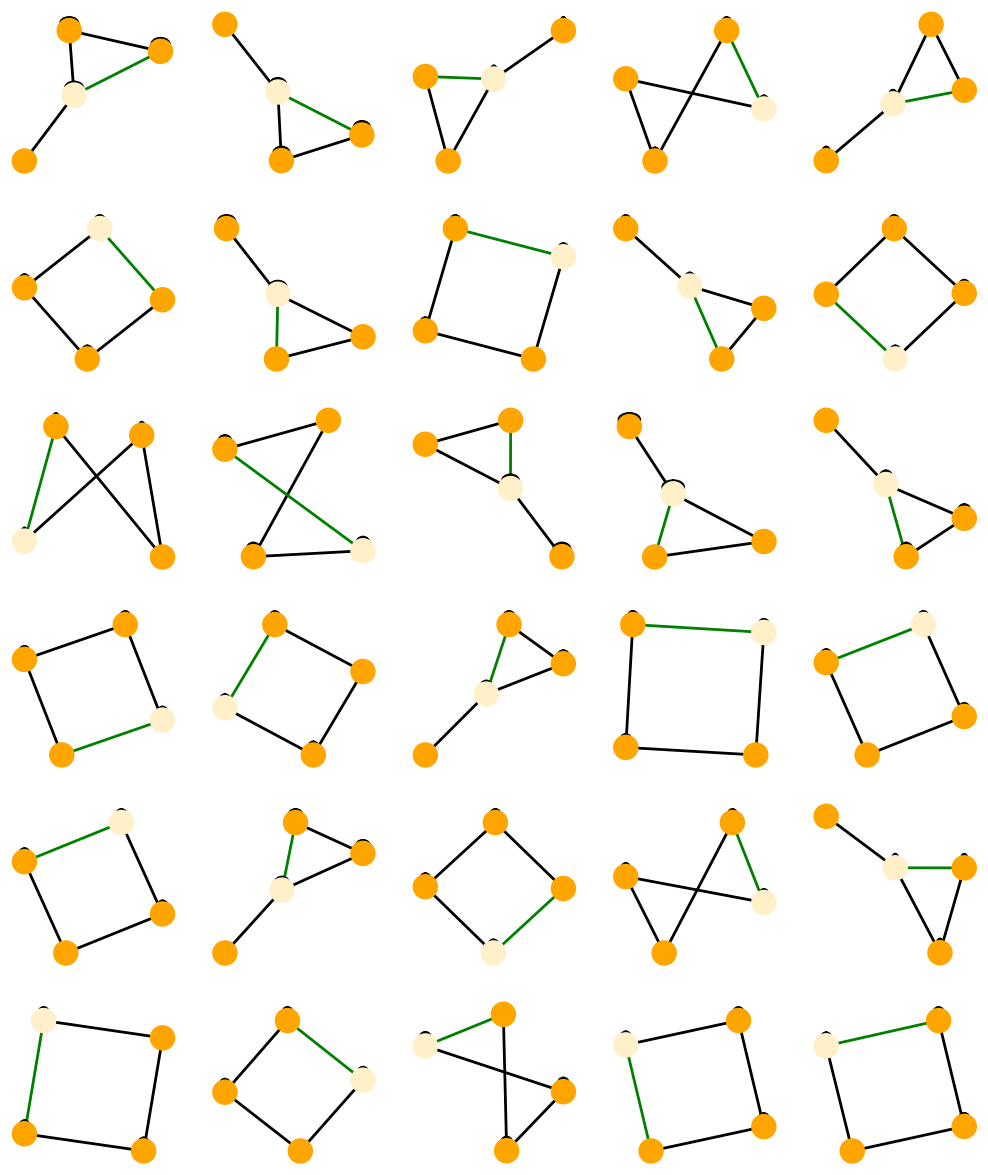

In [9]:
# Plot all identified graphs which have the smallest number of couplings
from autoscatter.architecture import characterize_architectures
irreducible_graphs_info = characterize_architectures(irreducible_graphs)
num_min_couplings = np.min(irreducible_graphs_info['num_couplings'])
idxs = np.where(irreducible_graphs_info['num_couplings'] == num_min_couplings)[0]
irreducible_graphs_min_couplings = irreducible_graphs[idxs]

node_colors = ['orange', 'orange', 'orange', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs_min_couplings, node_colors=node_colors)